In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [2]:
import numpy as np
from sklearn import model_selection

indexes = np.random.randint(70000, size=7000)

data = mnist.data[indexes]
#print(data.shape)
target = mnist.target[indexes]

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
    data, target, train_size=0.8
)


In [3]:
from sklearn import neighbors

k = 10

clf = neighbors.KNeighborsClassifier(k)
clf.fit(xtrain, ytrain)

probas = clf.predict_proba(xtest)

In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt

itest = 4

images = data.reshape((-1, 28, 28))
plt.imshow(images[itest],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()

print(probas[itest])

<Figure size 640x480 with 1 Axes>

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [5]:
#clf.score(xtest, ytest)
found_classes = clf.predict(xtest)

In [6]:
for itest in range(1,20):
    #itest = 4
    
    res =  " OK" if ytest[itest] == found_classes[itest] else ""

    print("Classe : " + ytest[itest] + " / Attendu " + found_classes[itest] + res)

Classe : 8 / Attendu 8 OK
Classe : 2 / Attendu 2 OK
Classe : 2 / Attendu 2 OK
Classe : 7 / Attendu 7 OK
Classe : 6 / Attendu 6 OK
Classe : 2 / Attendu 2 OK
Classe : 8 / Attendu 3
Classe : 2 / Attendu 2 OK
Classe : 0 / Attendu 0 OK
Classe : 6 / Attendu 6 OK
Classe : 0 / Attendu 0 OK
Classe : 0 / Attendu 0 OK
Classe : 2 / Attendu 2 OK
Classe : 2 / Attendu 2 OK
Classe : 5 / Attendu 5 OK
Classe : 6 / Attendu 6 OK
Classe : 8 / Attendu 8 OK
Classe : 4 / Attendu 4 OK
Classe : 0 / Attendu 0 OK


In [7]:
# BAD
"""
from sklearn.model_selection import KFold

scores_k = [0 for i in range(0,16)]

nb_splits = 10

# k = Nombre de voisins à considérer
for k in range(2,16):
    clf = neighbors.KNeighborsClassifier(k)    
    kf = KFold(n_splits=nb_splits, shuffle=True)

    

    for train_indexes, test_indexes in kf.split(data):
        # Calcul des xtest/ytest/xtrain/ytrain
        xtrain = data[train_indexes]
        xtest = data[test_indexes]
        ytrain = target[train_indexes]
        ytest = target[test_indexes]
    
        clf.fit(xtrain, ytrain)
        
        print(".", end = '')
        scores_k[k] += clf.score(xtest, ytest) / nb_splits
        
    
    print(scores_k[k])
"""

'\nfrom sklearn.model_selection import KFold\n\nscores_k = [0 for i in range(0,16)]\n\nnb_splits = 10\n\n# k = Nombre de voisins à considérer\nfor k in range(2,16):\n    clf = neighbors.KNeighborsClassifier(k)    \n    kf = KFold(n_splits=nb_splits, shuffle=True)\n\n    \n\n    for train_indexes, test_indexes in kf.split(data):\n        # Calcul des xtest/ytest/xtrain/ytrain\n        xtrain = data[train_indexes]\n        xtest = data[test_indexes]\n        ytrain = target[train_indexes]\n        ytest = target[test_indexes]\n    \n        clf.fit(xtrain, ytrain)\n        \n        print(".", end = \'\')\n        scores_k[k] += clf.score(xtest, ytest) / nb_splits\n        \n    \n    print(scores_k[k])\n'

In [8]:
from sklearn.model_selection import cross_val_score
import numpy as np
import time

scores_k2 = [0 for i in range(0,16)]
times_train_k = [0 for i in range(0,16)]
times_score_k = [0 for i in range(0,16)]


nb_splits = 10

# k = Nombre de voisins à considérer
for k in range(2,16):
    clf = neighbors.KNeighborsClassifier(k, n_jobs=-1)
    start_time = time.process_time()
    clf.fit(xtrain, ytrain)
    times_train_k[k] = (time.process_time() - start_time)
    
    start_time = time.process_time()
    score = np.mean(cross_val_score(clf, xtrain, ytrain, cv=10))
    times_score_k[k] = (time.process_time() - start_time)
    
    print("K = " + str(k) + " -> " + str(score))
    scores_k2[k] = score


K = 2 -> 0.9196369790662263
K = 3 -> 0.9333713789092078
K = 4 -> 0.9299834395436747
K = 5 -> 0.9317739970399692
K = 6 -> 0.9276691186763572
K = 7 -> 0.9287298925935887
K = 8 -> 0.9235574874648483
K = 9 -> 0.9242803500686341
K = 10 -> 0.924640705824294
K = 11 -> 0.9235609369424372
K = 12 -> 0.9214208546752829
K = 13 -> 0.9205280088662274
K = 14 -> 0.9201637992168509
K = 15 -> 0.917844825212863


[0, 0, 1.3982168199999947, 1.338579068999998, 1.3193898159999975, 1.3172053449999979, 1.321424750999995, 1.3217112069999999, 1.331511300999999, 1.3255598380000038, 1.3414449460000029, 1.3767603400000041, 1.3928462109999984, 1.4035195899999948, 1.4129013700000002, 1.4424170010000026]


Text(0.5, 1.0, "Temps d'entrainement et de prédiction pour différentes valeurs de k")

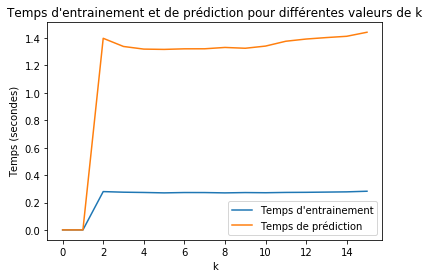

In [9]:

plt.plot([x for x in range(0, 16)], times_train_k)
plt.plot([x for x in range(0, 16)], times_score_k)

print(times_score_k)

plt.legend(['Temps d\'entrainement', 'Temps de prédiction'], loc='best')
plt.xlabel("k")
plt.ylabel("Temps (secondes)")
plt.title("Temps d'entrainement et de prédiction pour différentes valeurs de k")

#sklearn tsne

Text(0.5, 1.0, 'Score pour différentes valeurs de k')

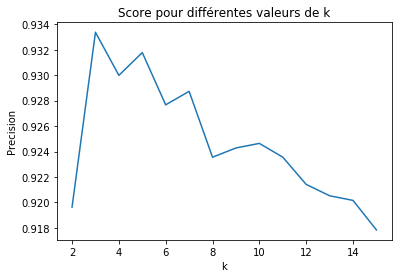

In [10]:

#plt.plot([x for x in range(2, 16)], scores_k[2:])
plt.plot([x for x in range(2, 16)], scores_k2[2:])

#plt.legend(['KFold', 'cross_val_score'], loc='upper right')
plt.xlabel("k")
plt.ylabel("Precision")
plt.title("Score pour différentes valeurs de k")

#sklearn tsne

# Résultat

Pour la suite, on prends la valeur k=5

In [11]:
from sklearn import neighbors

k=5
rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

scores_rate = []
for rate in rates:
    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
        data, target, train_size=rate
    )

    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(xtrain, ytrain)
    
    #print(str(len(ytrain)) + " - - - " + str(rate))
    score = clf.score(xtest, ytest)
    
    #score = np.mean(cross_val_score(clf, xtest, ytest, cv=10))

    print("Rate = " + str(rate) + " -> " + str(score))
    scores_rate.append(score)    

Rate = 0.1 -> 0.8584126984126984
Rate = 0.2 -> 0.8907142857142857
Rate = 0.3 -> 0.9108163265306123
Rate = 0.4 -> 0.9228571428571428
Rate = 0.5 -> 0.93
Rate = 0.6 -> 0.9371428571428572
Rate = 0.7 -> 0.9295238095238095
Rate = 0.8 -> 0.9457142857142857
Rate = 0.9 -> 0.9428571428571428


Text(0.5, 1.0, 'Score pour différents pourcentages consacrés au train(k=5)')

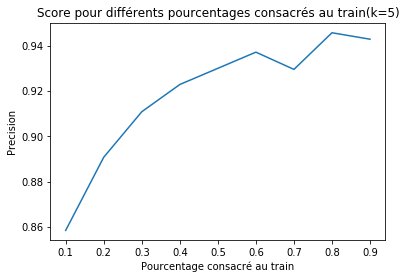

In [12]:
plt.plot([x for x in rates], scores_rate)

plt.xlabel("Pourcentage consacré au train")
plt.ylabel("Precision")
plt.title("Score pour différents pourcentages consacrés au train(k=" + str(k) +")")


# Résultat
Plus on alloue de données à l'entrainement, plus l'algorithme est efficace pour la classification.

In [13]:
from sklearn import neighbors

k=5
rate=0.8

# De 400 à 8000
sizes = [200*i for i in range(1, 51)]

scores_size = []
for size in sizes:
    
    indexes2 = np.random.randint(70000, size=size)

    data2 = mnist.data[indexes2]
    target2 = mnist.target[indexes2]

    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
        data2, target2, train_size=rate
    )

    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(xtrain, ytrain)
    
    score = clf.score(xtest, ytest)

    print("Size = " + str(size) + " -> " + str(score))
    scores_size.append(score)

Size = 200 -> 0.775
Size = 400 -> 0.7375
Size = 600 -> 0.7833333333333333
Size = 800 -> 0.88125
Size = 1000 -> 0.81
Size = 1200 -> 0.8875
Size = 1400 -> 0.9071428571428571
Size = 1600 -> 0.875
Size = 1800 -> 0.9
Size = 2000 -> 0.9075
Size = 2200 -> 0.9022727272727272
Size = 2400 -> 0.9166666666666666
Size = 2600 -> 0.9134615384615384
Size = 2800 -> 0.9303571428571429
Size = 3000 -> 0.8983333333333333
Size = 3200 -> 0.915625
Size = 3400 -> 0.9176470588235294
Size = 3600 -> 0.9236111111111112
Size = 3800 -> 0.9157894736842105
Size = 4000 -> 0.9175
Size = 4200 -> 0.9285714285714286
Size = 4400 -> 0.9238636363636363
Size = 4600 -> 0.9347826086956522
Size = 4800 -> 0.9385416666666667
Size = 5000 -> 0.924
Size = 5200 -> 0.9413461538461538
Size = 5400 -> 0.9296296296296296
Size = 5600 -> 0.9339285714285714
Size = 5800 -> 0.9353448275862069
Size = 6000 -> 0.9333333333333333
Size = 6200 -> 0.9185483870967742
Size = 6400 -> 0.9421875
Size = 6600 -> 0.9257575757575758
Size = 6800 -> 0.92279411764

Text(0.5, 1.0, "Score pour différentes tailles d'échantillon")

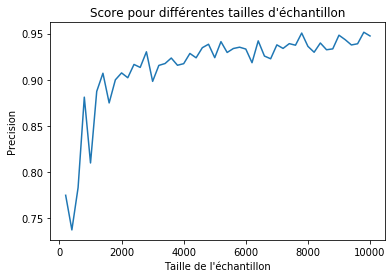

In [14]:
plt.plot([x for x in sizes], scores_size)

plt.xlabel("Taille de l'échantillon")
plt.ylabel("Precision")
plt.title("Score pour différentes tailles d'échantillon")


# Résultat
Plus la taille de l'échantillon est importante, plus la précision de l'algorithme est grande.

In [15]:
from sklearn import neighbors

k=5
rate = 0.8
ps = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
scores_p = []

for p in ps:
    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
        data, target, train_size=rate
    )

    clf = neighbors.KNeighborsClassifier(k, p=p, n_jobs=-1)
    clf.fit(xtrain, ytrain)
    
    score = clf.score(xtest, ytest)

    print("P = " + str(p) + " -> " + str(score))
    scores_p.append(score)    

P = 1 -> 0.9178571428571428
P = 2 -> 0.9407142857142857
P = 3 -> 0.9371428571428572
P = 4 -> 0.9492857142857143
P = 5 -> 0.9514285714285714
P = 6 -> 0.9371428571428572
P = 7 -> 0.9435714285714286
P = 8 -> 0.9407142857142857
P = 9 -> 0.9392857142857143
P = 10 -> 0.9421428571428572
P = 11 -> 0.9464285714285714
P = 12 -> 0.9471428571428572
P = 13 -> 0.9507142857142857
P = 14 -> 0.95
P = 15 -> 0.945
P = 16 -> 0.9464285714285714
P = 17 -> 0.9378571428571428
P = 18 -> 0.9421428571428572
P = 19 -> 0.9571428571428572


Text(0.5, 1.0, 'Score pour différentes valeurs de p(k=5)')

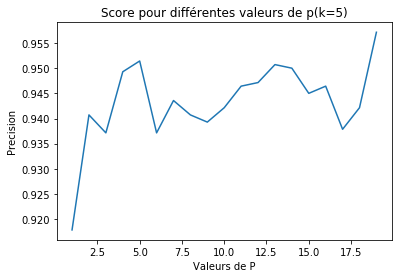

In [16]:
plt.plot([x for x in ps], scores_p)

plt.xlabel("Valeurs de P")
plt.ylabel("Precision")
plt.title("Score pour différentes valeurs de p(k=" + str(k) +")")


# Résultat

Augmentation de la précision en augmentant la norme utilisée

In [17]:
%%time

from sklearn import neighbors
import time


k=5
rate = 0.8
p = 7

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
    data, target, train_size=rate
)

# Mesure avec n_jobs = 1
start_time = time.time()
start_process_time = time.process_time()
clf = neighbors.KNeighborsClassifier(k, p=p, n_jobs = 1)
clf.fit(xtrain, ytrain)
end_time = time.time()
end_process_time = time.process_time()

score = clf.score(xtest, ytest)


print("n_jobs = 1 -> " + str(score) + " time : " + str(end_time - start_time))
print("n_jobs = 1 -> " + str(score) + " process time : " + str(end_process_time - start_process_time))




# Mesure avec n_jobs = -1
start_time = time.time()
start_process_time = time.process_time()

clf = neighbors.KNeighborsClassifier(k, p=p, n_jobs = -1)
clf.fit(xtrain, ytrain)
end_time = time.time()
end_process_time = time.process_time()

score = clf.score(xtest, ytest)



print("n_jobs = -1 -> " + str(score) + " time : " + str(end_time - start_time))
print("n_jobs = -1 -> " + str(score) + " process time : " + str(end_process_time - start_process_time))



n_jobs = 1 -> 0.9507142857142857 time : 0.13569307327270508
n_jobs = 1 -> 0.9507142857142857 process time : 0.13664105300085794
n_jobs = -1 -> 0.9507142857142857 time : 0.11172866821289062
n_jobs = -1 -> 0.9507142857142857 process time : 0.1119677850001608
CPU times: user 5min 39s, sys: 128 ms, total: 5min 39s
Wall time: 3min 15s
